In [1]:
# ! pip install pandas-profiling[notebook]

# EDA

I will follow the IBM Garage Method for Data Science approach to solve the suggested task of <font color="red">building a model to predict if an applicant is 'good' or 'bad' client, the definition of 'good' or 'bad' is not given</font>. The model will be developed in a local Jupyter Notebook for simplicity and later transferred to an IBM Data Platform notebook to train it and serialize it. Finally, I will deploy the model in the Google Cloud ML managed service.  

## Imports

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport

## Load datasets

In [3]:
application = pd.read_parquet(f"data/application.parquet")
credit_record = pd.read_parquet(f"data/credit_record.parquet")

## Applications

In [4]:
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0            None   
1           1                1           0           0            None   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [5]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### Overview

In [6]:
ProfileReport(application, title="Applications report", explorative=False)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Credit records

In [7]:
credit_record.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [8]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
ProfileReport(credit_record, title="Credit records report", explorative=False)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Missing values

<AxesSubplot:>

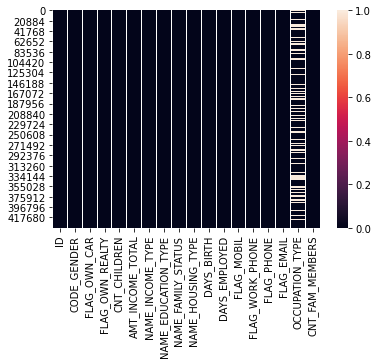

In [11]:
sns.heatmap(application.isnull())

There are nearly 30% missing values for the OCCUPATION_TYPE field in the applications dataset

<AxesSubplot:>

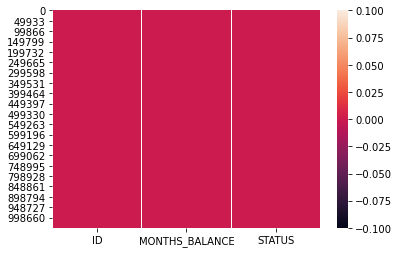

In [12]:
sns.heatmap(credit_record.isnull())

There are no missing values in the records dataset

## Distributions

In [13]:
application.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

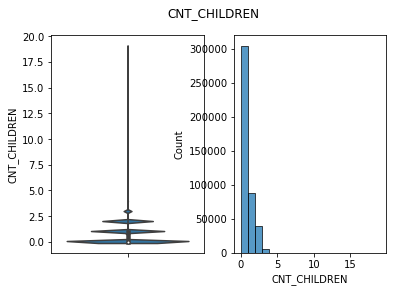

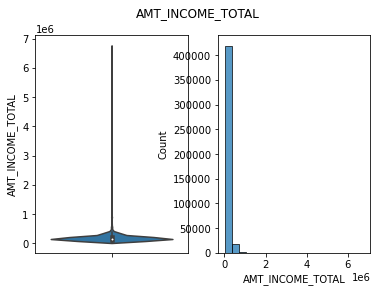

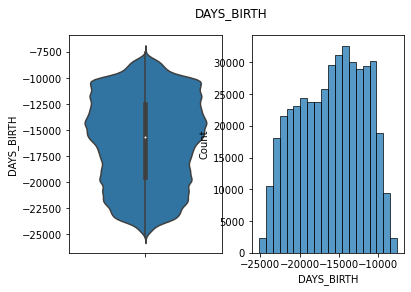

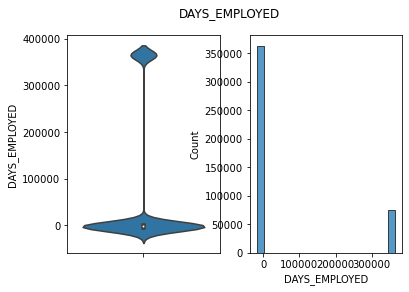

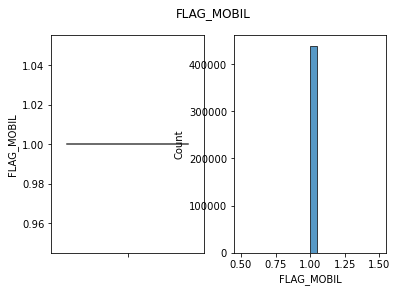

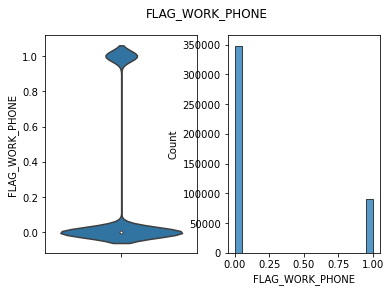

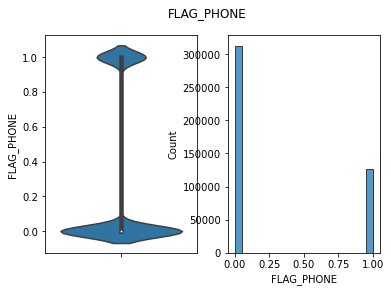

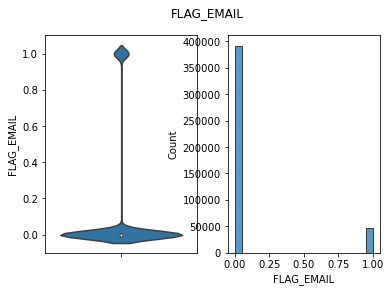

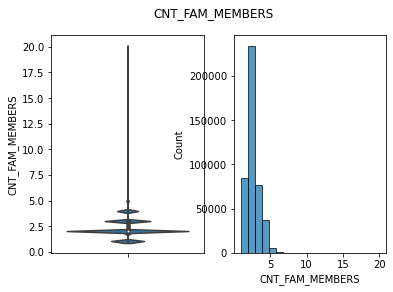

In [40]:
# Plot disctribution graphs for all numerical features
for feature in application.columns:
    if application[feature].dtype != "object" and feature != "ID":
        fig, axes = plt.subplots(1,2)
        fig.suptitle(feature)
        sns.violinplot(ax=axes[0], data=application,y=feature)
        sns.histplot(ax=axes[1], data=application,x=feature, bins=20)
        plt.show()

## Complementary EDA

Plot the heatmap of the months elapsed for defaulting

<AxesSubplot:xlabel='BUCKET', ylabel='STATUS'>

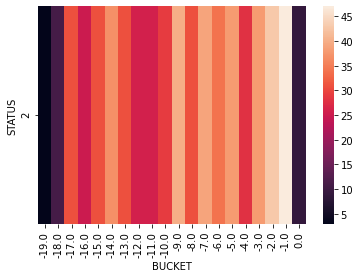

In [24]:
# Find the first overdue record for each customer and its corresponding month
df_defaults = credit_record.query("STATUS in ['2']")
df_first_defaults = df_defaults.loc[df_defaults.groupby("ID")["MONTHS_BALANCE"].idxmin().values]
df_first_defaults["BUCKET"] = np.floor(df_first_defaults["MONTHS_BALANCE"]/3)
sns.heatmap(pd.crosstab(df_first_defaults["STATUS"],df_first_defaults["BUCKET"]))